## Finetune language model for SQL generation.

In [1]:
!pip install scikit-build-core==0.9.0
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip3 install llama-cpp-python
!pip3 install huggingface-hub
!pip3 install accelerate peft bitsandbytes transformers trl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.4/151.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 MB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 7.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for llama-cpp-python (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for llama-cpp-python
Failed to build llama-cpp-python
ERROR: Could not build wheels for llama-cpp-python, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on -DCMAKE_CUDA_ARCHITECTURES=61" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.62 --force-reinstall --upgrade --no-cache-dir --verbose --no-build-isolation

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.5 MB/s eta 0:00:00
  Running command Preparing metadata (pyproject.toml)
  *** scikit-build-core 0.9.0 using CMake 3.27.9 (metadata_wheel)
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 145.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 189.1 MB/s eta 0:00:00
  Running command Building wheel for llama-cpp-python (pyproject.toml)
  *** scikit-build-core 0.9.0 using CMake 3.27.9 (wheel)
  *** Configuring CMake...
  loading initial cache file /tmp/tmpnulc2mcr/build/CMakeInit.txt
  -- The C compiler identification is GNU 11.4.0
  -- The CXX compiler identification is GNU 11.4.0
  -- Detecting C compiler ABI info
  -- Detecting C compiler ABI info - done
  -- Check for working C co

In [3]:
!pip install datasets==2.10.1
!pip install pyarrow==14.0.1
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
  Attempting uninstall: datasets
    Found existing installation: datasets 2.20.0
    Uninstalling datasets-2.20.0:
      Successfully uninstalled datasets-2.20.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from huggingface_hub import hf_hub_download

model_name = "TheBloke/TinyLlama-1.1B-Chat-v1.0-GGUF"

# Define the name of the model file to download.
model_file = "tinyllama-1.1b-chat-v1.0.Q8_0.gguf"

# Download the model from the Hugging Face Hub and store the
# path to the downloaded file in the `model_path` variable.
model_path = hf_hub_download(model_name, filename=model_file)

# Print a message indicating that the model has been downloaded.
print(f"Model downloaded to: {model_path}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tinyllama-1.1b-chat-v1.0.Q8_0.gguf:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Model downloaded to: /root/.cache/huggingface/hub/models--TheBloke--TinyLlama-1.1B-Chat-v1.0-GGUF/snapshots/52e7645ba7c309695bec7ac98f4f005b139cf465/tinyllama-1.1b-chat-v1.0.Q8_0.gguf


In [5]:
from llama_cpp import Llama

# Initialize a `Llama` object with the downloaded model path.
llm = Llama(
    model_path=model_path,

    # Set the number of context tokens.
    n_ctx=512,

    # Set the number of threads to use.
    n_threads=8,

    # Set the number of GPU layers to work with.
    n_gpu_layers=40
)

# Print a message indicating that the Llama object has been initialized.
print("Llama object initialized successfully.")

llama_model_loader: loaded meta data with 23 key-value pairs and 201 tensors from /root/.cache/huggingface/hub/models--TheBloke--TinyLlama-1.1B-Chat-v1.0-GGUF/snapshots/52e7645ba7c309695bec7ac98f4f005b139cf465/tinyllama-1.1b-chat-v1.0.Q8_0.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = tinyllama_tinyllama-1.1b-chat-v1.0
llama_model_loader: - kv   2:                       llama.context_length u32              = 2048
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 2048
llama_model_loader: - kv   4:                          llama.block_count u32              = 22
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 5632
llama_model_loader:

Llama object initialized successfully.


AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | MATMUL_INT8 = 0 | 
Model metadata: {'tokenizer.chat_template': "{% for message in messages %}\n{% if message['role'] == 'user' %}\n{{ '<|user|>\n' + message['content'] + eos_token }}\n{% elif message['role'] == 'system' %}\n{{ '<|system|>\n' + message['content'] + eos_token }}\n{% elif message['role'] == 'assistant' %}\n{{ '<|assistant|>\n'  + message['content'] + eos_token }}\n{% endif %}\n{% if loop.last and add_generation_prompt %}\n{{ '<|assistant|>' }}\n{% endif %}\n{% endfor %}", 'tokenizer.ggml.padding_token_id': '2', 'tokenizer.ggml.unknown_token_id': '0', 'tokenizer.ggml.eos_token_id': '2', 'general.architecture': 'llama', 'llama.rope.freq_base': '10000.000000', 'llama.context_length': '2048', 'general.name': 'tinyllama_tinyllama-1.1b-chat-v1.0', 'llama.embedding_length': '20

In [6]:
# Use the Llama object to generate an answer to the question.
output = llm(
    # Prompt
    "<|im_start|>user\nAre you a robot?<|im_end|>\n<|im_start|>assistant\n",

    # Set the maximum number of tokens to generate.
    max_tokens=512,

    # Set the stop sequences to indicate the end of the generated text.
    stop=["</s>"],
)

# Print the generated text.
print(output['choices'][0]['text'])


llama_print_timings:        load time =   20627.07 ms
llama_print_timings:      sample time =      47.08 ms /    56 runs   (    0.84 ms per token,  1189.39 tokens per second)
llama_print_timings: prompt eval time =   20626.98 ms /    33 tokens (  625.06 ms per token,     1.60 tokens per second)
llama_print_timings:        eval time =     681.43 ms /    55 runs   (   12.39 ms per token,    80.71 tokens per second)
llama_print_timings:       total time =   21700.39 ms /    88 tokens


I am not a robot. But yes, I can be programmed to perform specific tasks based on the instructions given by humans. For example, I could be used in search and rescue missions, disaster relief efforts, or as part of an automated factory floor.


In [7]:
def chat_template(question, context):
    """
    Creates a chat template for the Llama model.

    Args:
        question: The question to be answered.
        context: The context information to be used for generating the answer.

    Returns:
        A string containing the chat template.
    """

    template = f"""\
    <|im_start|>user
    Given the context, generate an SQL query for the following question
    context:{context}
    question:{question}
    <|im_end|>
    <|im_start|>assistant
    """
    # Remove any leading whitespace characters from each line in the template.
    template = "\n".join([line.lstrip() for line in template.splitlines()])
    return template

In [8]:
question = "How many heads of the departments are older than 56 ?"
context = "CREATE TABLE head (age INTEGER)"

print(chat_template(question,context))

<|im_start|>user
Given the context, generate an SQL query for the following question
context:CREATE TABLE head (age INTEGER)
question:How many heads of the departments are older than 56 ?
<|im_end|>
<|im_start|>assistant



In [9]:
# Use the Llama object to generate an answer to the question.
output = llm(
    chat_template(question, context),


    # Set the maximum number of tokens to generate.
    max_tokens=512,


    # Set the stop sequences to indicate the end of the generated text.
    stop=["</s>"],
)


# Print the generated text.
print(output['choices'][0]['text'])

Llama.generate: prefix-match hit

llama_print_timings:        load time =   20627.07 ms
llama_print_timings:      sample time =     213.09 ms /   145 runs   (    1.47 ms per token,   680.45 tokens per second)
llama_print_timings: prompt eval time =      37.39 ms /    61 tokens (    0.61 ms per token,  1631.58 tokens per second)
llama_print_timings:        eval time =    1986.09 ms /   144 runs   (   13.79 ms per token,    72.50 tokens per second)
llama_print_timings:       total time =    3392.92 ms /   205 tokens


To generate a SQL query for the given context, we can use the `GROUP BY` clause to group by the head column and then retrieve the count of age values that are older than 56. Here's an example:

```sql
SELECT age FROM head GROUP BY age;
```

Output:
```
+----------+
| age      |
+----------+
| 42       |
| 43       |
| 56       |
+----------+
```

The output shows that there are two heads of the department with age greater than or equal to 56, and one head with an age value of 56.


In [10]:
from datasets import load_dataset, Dataset
# Define the dataset for fine-tuning
dataset_id = "b-mc2/sql-create-context"

data = load_dataset(dataset_id, split="train",  download_mode="force_redownload")
df = data.to_pandas()

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/b-mc2___json/b-mc2--sql-create-context-b6e5c5a03fb67709/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51. Subsequent calls will reuse this data.


In [11]:
df = df.sample(frac=0.1, random_state=1).reset_index(drop=True)

In [12]:
def chat_template_for_training(context, answer, question):
    """
    Creates a chat template for training the TinyLlama model.

    Args:
        question: The question to be answered.
        context: The context information to be used for generating the answer.'
        answer: The answer to be generated by the LLM

    Returns:
        A string containing the chat template.
    """

    template = f"""\
    <|im_start|>user
    Given the context, generate an SQL query for the following question
    context:{context}
    question:{question}
    <|im_end|>
    <|im_start|>assistant
    {answer}
    <|im_end|>
    """
    # Remove any leading whitespace characters from each line in the template.
    template = "\n".join([line.lstrip() for line in template.splitlines()])
    return template

In [13]:
# Apply the chat_template_for_training function to each row in the
# dataframe and store the result in a new "text" column.
df["text"] = df.apply(lambda x: chat_template_for_training(x["context"],
x["answer"], x["question"]), axis=1)

# Convert the dataframe back to a Dataset object.
formatted_data = Dataset.from_pandas(df)

In [14]:
print(df['text'][1])

<|im_start|>user
Given the context, generate an SQL query for the following question
context:CREATE TABLE table_name_13 (run_3 VARCHAR, run_1 VARCHAR)
question:Which Run 3 has a Run 1 of 2:20.10?
<|im_end|>
<|im_start|>assistant
SELECT run_3 FROM table_name_13 WHERE run_1 = "2:20.10"
<|im_end|>



In [15]:
from transformers import AutoTokenizer

# Define the model to fine-tune
model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

# Load the tokenizer for the specified model.
tokenizer = AutoTokenizer.from_pretrained(model_id)


# Set the padding token to be the same as the end of sentence token.
tokenizer.pad_token = tokenizer.eos_token

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

In [16]:
import torch
from transformers import BitsAndBytesConfig, AutoModelForCausalLM

# Define the quantization configuration for memory-efficient training.
bnb_config = BitsAndBytesConfig(
    # Load the model weights in 4-bit quantized format.
    load_in_4bit=True,


    # Specify the quantization type to use for 4-bit quantization.
    bnb_4bit_quant_type="nf4",


    # Specify the data type to use for computations during training.
    bnb_4bit_compute_dtype="float16",


    # Specify whether to use double quantization for 4-bit quantization.
    bnb_4bit_use_double_quant=True
)

# Load the model from the specified model ID and apply the quantization configuration.
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map="auto",
    torch_dtype=torch.float16
)

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [17]:
# Disable cache to improve training speed.
model.config.use_cache = False

# Set the temperature for pretraining to 1.
model.config.pretraining_tp = 1

In [18]:
from peft import LoraConfig

# Define the PEFT configuration.
peft_config = LoraConfig(
    # Set the rank of the LoRA projection matrix.
    r=8,

    # Set the alpha parameter for the LoRA projection matrix.
    lora_alpha=16,

    # Set the dropout rate for the LoRA projection matrix.
    lora_dropout=0.05,

    # Set the bias term to "none".
    bias="none",

    # Set the task type to "CAUSAL_LM".
    task_type="CAUSAL_LM"
)

In [19]:
from transformers import TrainingArguments

# Define the training arguments.
training_args = TrainingArguments(
    # Set the output directory for the training run.
    output_dir="tinyllama-sqllm-v1",

    # Set the per-device training batch size.
    per_device_train_batch_size=2,

    # Set the number of gradient accumulation steps.
    gradient_accumulation_steps=2,

    # Set the optimizer to use.
    optim="paged_adamw_32bit",

    # Set the learning rate.
    learning_rate=2e-3,

    # Set the learning rate scheduler type.
    lr_scheduler_type="cosine",

    # Set the save strategy.
    save_strategy="epoch",

    # Set the logging steps.
    logging_steps=100,

    # Set the number of training epochs.
    num_train_epochs=3,

    # Set the maximum number of training steps.
    # max_steps=1800,

    # Enable fp16 training.
    fp16=True,
)


In [21]:
from trl import SFTTrainer

# Initialize the SFTTrainer.
trainer = SFTTrainer(
    # Set the model to be trained.
    model=model,

    # Set the training dataset.
    train_dataset=formatted_data,

    # Set the PEFT configuration.
    peft_config=peft_config,

    # Set the name of the text field in the dataset.
    dataset_text_field="text",

    # Set the training arguments.
    args=training_args,

    # Set the tokenizer.
    tokenizer=tokenizer,

    # Disable packing.
    packing=False,

    # Set the maximum sequence length.
    max_seq_length=1024
)

op = trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:100: FutureWarning: Deprecated argument(s) used in '__init__': dataset_text_field, max_seq_length. Will not be supported from version '1.0.0'.

Deprecated positional argument(s) used in SFTTrainer, please use the SFTConfig to set these arguments instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1965: FutureWarning: `--push_to_hub_token` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_token` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1965: FutureWarning: `--push_to_hub_token` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_token` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:269: UserWarning: You passed a `max_seq_length` argument to the SFTTrainer, the value you passed will override the

Map:   0%|          | 0/7858 [00:00<?, ? examples/s]

Step,Training Loss
100,0.756200
200,0.628600
300,0.625000
400,0.618300
500,0.621200
600,0.613700
700,0.607500
800,0.613200
900,0.620200
1000,0.616000


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [22]:
from peft import AutoPeftModelForCausalLM, PeftModel
import torch
# Load the pre-trained model.
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    load_in_8bit=False,
    device_map="auto",
    trust_remote_code=True
)

# Load the PEFT model from a checkpoint.
model_path = "/content/tinyllama-sqllm-v1/checkpoint-5892"
peft_model = PeftModel.from_pretrained(model, model_path, from_transformers=True, device_map="auto")

# Wrap the model with the PEFT model.
model = peft_model.merge_and_unload()

In [23]:
# Prepare the Prompt.
question = "How many heads of the departments are older than 56 ?"
context = "CREATE TABLE head (age INTEGER)"
prompt = chat_template(question,context)

# Encode the prompt.
inputs = tokenizer(prompt, return_tensors="pt").to('cuda')

# Generate the output.
output = model.generate(**inputs, max_new_tokens=512)

# Decode the output.
text = tokenizer.decode(output[0], skip_special_tokens=True)

# Print the generated SQL query.
print(text)

<|im_start|>user
Given the context, generate an SQL query for the following question
context:CREATE TABLE head (age INTEGER)
question:How many heads of the departments are older than 56 ?
<|im_end|>
<|im_start|>assistant
SELECT COUNT(*) FROM head WHERE age > 56
<|im_end|>
<|im_start|>assistant
SELECT COUNT(*) FROM head WHERE age > 56
<|im_end|>
<|im_start|>assistant
SELECT COUNT(*) FROM head WHERE age > 56
<|im_end|>
<|im_start|>assistant
SELECT COUNT(*) FROM head WHERE age > 56
<|im_end|>
<|im_start|>assistant
SELECT COUNT(*) FROM head WHERE age > 56
<|im_end|>
<|im_start|>assistant
SELECT COUNT(*) FROM head WHERE age > 56
<|im_end|>
<|im_start|>assistant
SELECT COUNT(*) FROM head WHERE age > 56
<|im_end|>
<|im_start|>assistant
SELECT COUNT(*) FROM head WHERE age > 56
<|im_end|>
<|im_start|>assistant
SELECT COUNT(*) FROM head WHERE age > 56
<|im_end|>
<|im_start|>assistant
SELECT COUNT(*) FROM head WHERE age > 56
<|im_end|>
<|im_start|>assistant
SELECT COUNT(*) FROM head WHERE age > 5

In [24]:
# Prepare the Prompt.
question = "How many unique names of people older than 50?"
context = "CREATE TABLE head (lname VARCHAR, age INTEGER)"
prompt = chat_template(question,context)

# Encode the prompt.
inputs = tokenizer(prompt, return_tensors="pt").to('cuda')

# Generate the output.
output = model.generate(**inputs, max_new_tokens=512)

# Decode the output.
text = tokenizer.decode(output[0], skip_special_tokens=True)

# Print the generated SQL query.
print(text)

<|im_start|>user
Given the context, generate an SQL query for the following question
context:CREATE TABLE head (lname VARCHAR, age INTEGER)
question:How many unique names of people older than 50?
<|im_end|>
<|im_start|>assistant
SELECT COUNT(lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>a

### loss visualization

In [40]:
losses = []
for item in trainer.state.log_history:
  try:
    losses.append(item['loss'])
  except:
    losses.append(loss[-1])

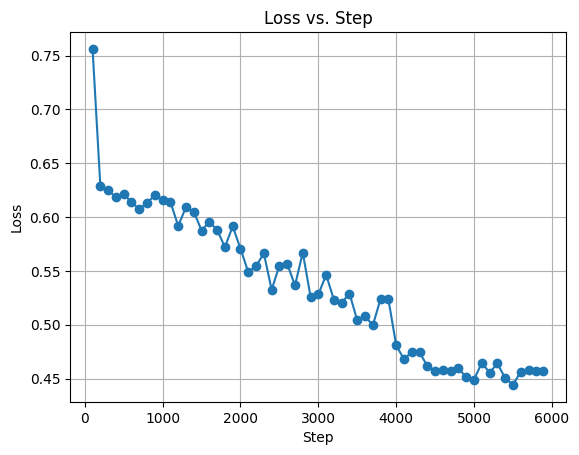

In [41]:
import matplotlib.pyplot as plt

steps = [item['step'] for item in trainer.state.log_history]
# losses = [item['loss'] for item in trainer.state.log_history]

# Plotting the data
plt.plot(steps, losses, marker='o')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss vs. Step')
plt.grid(True)
plt.show()

## Model Upload

In [ ]:
!pip install huggingface-hub

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGrained).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your termin

In [ ]:
model.push_to_hub("tinyllama_text2sql")
tokenizer.push_to_hub("tinyllama_text2sql")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/hussnainahmedsaqib/tinyllama_text2sql/commit/4923cb89b22b60a49c378135c027505b39036d13', commit_message='Upload tokenizer', commit_description='', oid='4923cb89b22b60a49c378135c027505b39036d13', pr_url=None, pr_revision=None, pr_num=None)

## Inference

In [25]:
from transformers import AutoTokenizer, AutoModelForCausalLM

question = "How many unique names of people older than 50?"
context = "CREATE TABLE head (lname VARCHAR, age INTEGER)"
prompt = chat_template(question,context)
tokenizer = AutoTokenizer.from_pretrained("hussnainahmedsaqib/tinyllama_text2sql")
model = AutoModelForCausalLM.from_pretrained("hussnainahmedsaqib/tinyllama_text2sql")

inputs = tokenizer(prompt, return_tensors="pt")

output = model.generate(**inputs, max_new_tokens=512)

text = tokenizer.decode(output[0], skip_special_tokens=True)

print(text)

tokenizer_config.json:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/713 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

<|im_start|>user
Given the context, generate an SQL query for the following question
context:CREATE TABLE head (lname VARCHAR, age INTEGER)
question:How many unique names of people older than 50?
<|im_end|>
<|im_start|>assistant
SELECT COUNT(DISTINCT lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(DISTINCT lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(DISTINCT lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>user
DELETE FROM head WHERE lname = 'Jones'
<|im_end|>
<|im_start|>assistant
SELECT COUNT(DISTINCT lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(DISTINCT lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(DISTINCT lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(DISTINCT lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT COUNT(DISTINCT lname) FROM head WHERE age > 50
<|im_end|>
<|im_start|>assistant
SELECT C